# Visualising a multiverse

As an example, we inspect the famous *“Female hurricanes are deadlier than male hurricanes”* multiverse from [Simonsohn et al. (2020)](https://www.nature.com/articles/s41562-020-0912-z). The implementation of this multiverse is implemented in the [Hurricane multiverse (non-neuroimaging)](example_mv_hurricane.ipynb) example below.

We start by loading the multiverse from memory and print the forking paths as a table:

In [1]:
from comet import multiverse

mverse = multiverse.load_multiverse("example_mv_hurricane")
mverse.summary()

,Universe,Decision 1,Value 1,Decision 2,Value 2,Decision 3,Value 3,Decision 4,Value 4,Decision 5,Value 5,Decision 6,Value 6,Decision 7,Value 7
0,Universe_1,death_outliers,2,damage_outliers,3,femininity_rating,fem_likert,damage_functional,ln,effect_type,femininity * damages,year_interaction,NaN,model,log_linear
1,Universe_2,death_outliers,2,damage_outliers,3,femininity_rating,fem_likert,damage_functional,ln,effect_type,femininity * damages,year_interaction,NaN,model,neg_binomial
2,Universe_3,death_outliers,2,damage_outliers,3,femininity_rating,fem_likert,damage_functional,ln,effect_type,femininity * damages,year_interaction,+ post1979:damages,model,log_linear
3,Universe_4,death_outliers,2,damage_outliers,3,femininity_rating,fem_likert,damage_functional,ln,effect_type,femininity * damages,year_interaction,+ post1979:damages,model,neg_binomial
4,Universe_5,death_outliers,2,damage_outliers,3,femininity_rating,fem_likert,damage_functional,ln,effect_type,femininity * damages,year_interaction,+ year:damages,model,log_linear
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1723,Universe_1724,death_outliers,0,damage_outliers,0,femininity_rating,fem_binary,damage_functional,linear,effect_type,femininity + damages + z3,year_interaction,NaN,model,neg_binomial
1724,Universe_1725,death_outliers,0,damage_outliers,0,femininity_rating,fem_binary,damage_functional,linear,effect_type,femininity + damages + z3,year_interaction,+ post1979:damages,model,log_linear
1725,Universe_1726,death_outliers,0,damage_outliers,0,femininity_rating,fem_binary,damage_functional,linear,effect_type,femininity + damages + z3,year_interaction,+ post1979:damages,model,neg_binomial
1726,Universe_1727,death_outliers,0,damage_outliers,0,femininity_rating,fem_binary,damage_functional,linear,effect_type,femininity + damages + z3,year_interaction,+ year:damages,model,log_linear


We can visualise the structure any linear multiverse as a feed-forward network:

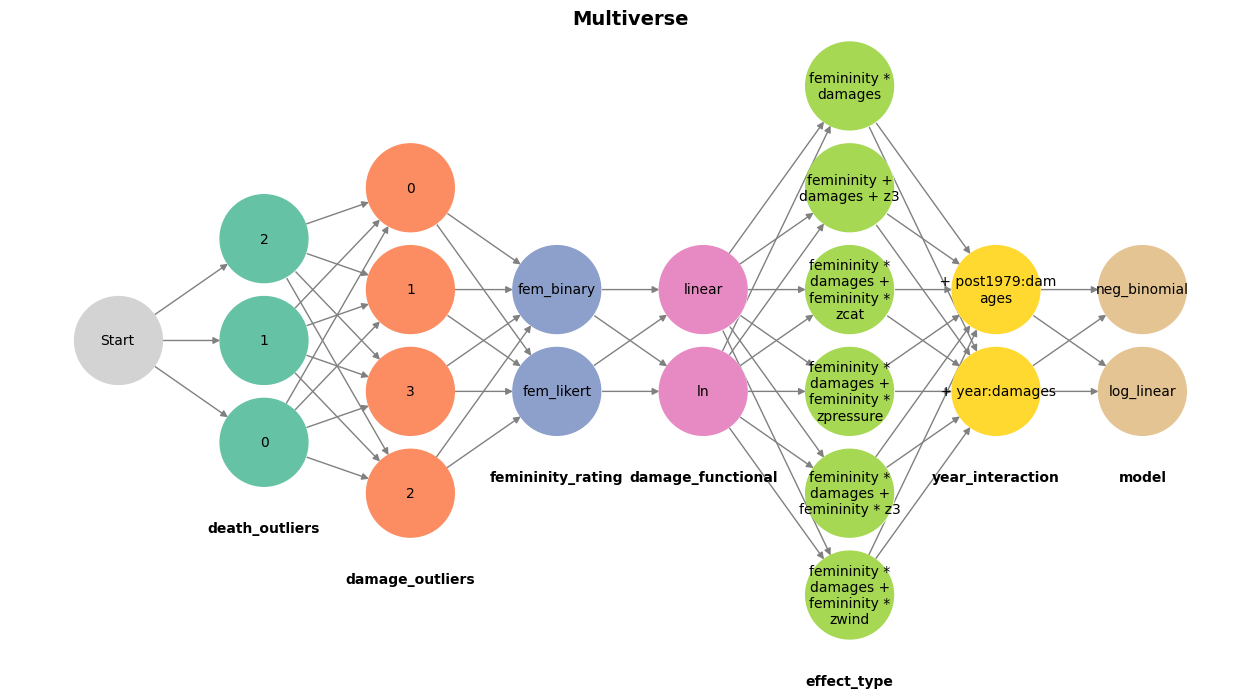

In [2]:
mverse.visualize(figsize=(16, 8), text_size=10, node_size=4000)

The results of a multiverse can be visualised with two main functions, namely a specification curve and a multiverse plot.

A traditional specification curve plots the results of each multiverse against the individual specification. This is often useful, but does not scale well with large multiverses like the present one:

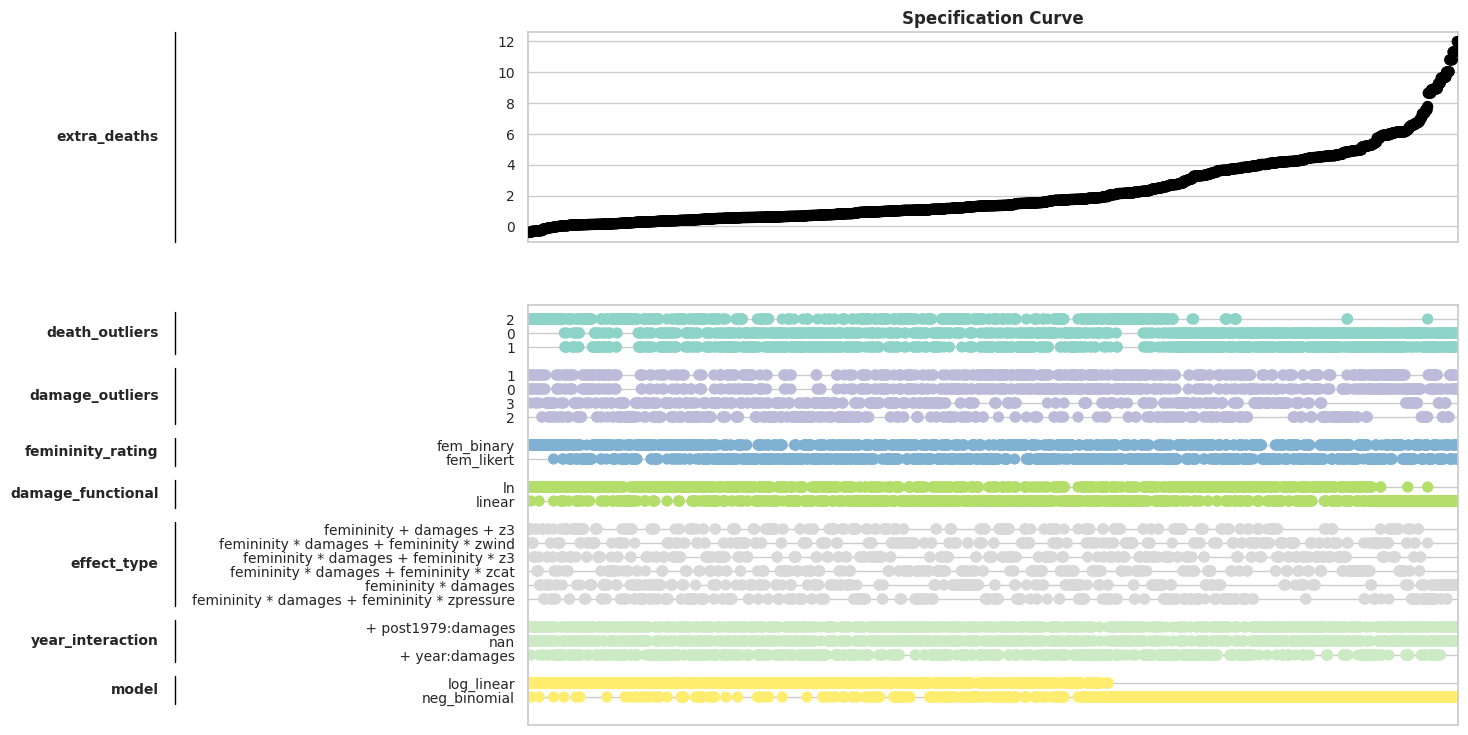

In [3]:
mverse.specification_curve("extra_deaths", figsize=(12,9), height_ratio=(1,2), line_pad=0.05)

A more modern alternative is a multiverse plot, which visualises the results as a density function and groups the specifications into bins (Krähmer & Young, 2026). Here it becomes easily visible how most effects are close to 0 and not significant.

> Krähmer, D., & Young, C. (2026). Visualizing vastness: Graphical methods for multiverse analysis. PLOS One, 21(2), e0339452. https://doi.org/10.1371/journal.pone.0339452

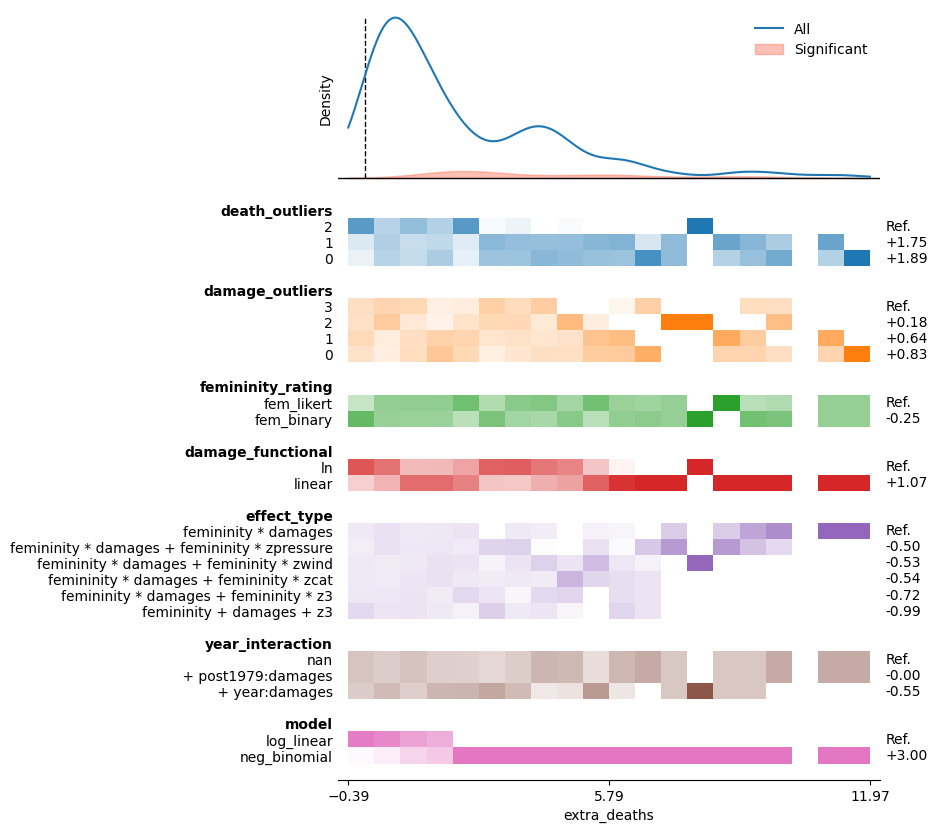

In [4]:
mverse.multiverse_plot(measure="extra_deaths", n_bins=20, sig_col="p_val", baseline=0, figsize=(7,10))